In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Start by Loading the Data
X = np.load('Datasets/Data/X.npy')
Y = np.load('Datasets/Data/Y.npy')
print(X.shape,Y.shape)

(100, 2) (100,)


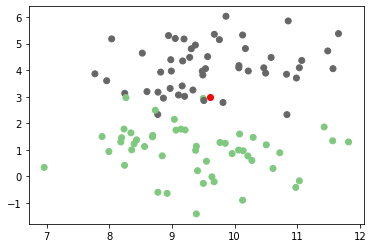

In [45]:
# Visualise all points
test_point = np.array([9.6,3])
plt.scatter(test_point[0],test_point[1],color='red')
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [46]:
mapping ={
    0 : "kiwi",
    1 : "blackfruit"
}

In [51]:
mapping[1]

'blackfruit'

In [94]:
def dist(p1,p2):
    return np.sum((p1-p2)**2)**.5

def KNN(X,Y,test_point,k=5):
    
    d = []
    m = X.shape[0]
    #1 - Distance of test_point from all points
    for i in range(m):
        current_dist = dist(test_point,X[i])
        d.append((current_dist,Y[i]))
        
    # 2 - Sort 
    d = sorted(d)
    # 3 - Pick the first k points
    d = d[:k]

    # 4 - Create an numpy array 
    d = np.array(d)
    
    d = d[:,1]
    #print(d)
    # 5 - Find out uniq classes and counts
    uniq,cnts = np.unique(d,return_counts=True)
    idx = np.argmax(cnts)
    # 6 -  Find the label with maximum cnt
    pred = uniq[idx]
    # Mapping indices to classname
    return int(pred)
    
KNN(X,Y,test_point)

ValueError: operands could not be broadcast together with shapes (2,) (784,) 

In [95]:
#Install 
!pip install pandas

You are using pip version 19.0.3, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [96]:
# Digit Classification
import pandas as pd

In [81]:
# Read the CSV files for MNIST Data
def prepareData(file):
    df = pd.read_csv(file,header=None)
    data = df.values
    X = data[: , : -1]
    Y = data[ :  , -1]
    return X,Y


In [87]:
X,Y = prepareData('Datasets/MNIST-1/train.csv')
Xt,Yt = prepareData('Datasets/MNIST-1/test.csv')

In [83]:
print(Xt.shape)

(10000, 784)


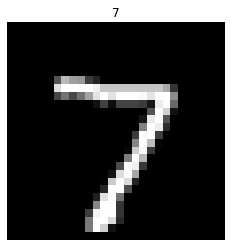

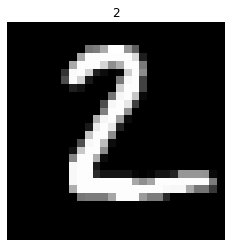

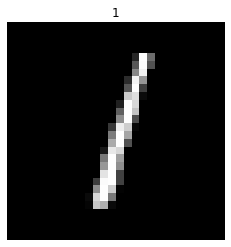

In [89]:
# Task for you! 
# Plot the first 5 images from X
for i in range(3):
    current_row = Xt[i]
    current_row = current_row.reshape(28,28)
    plt.imshow(current_row,cmap='gray')
    plt.title(Yt[i])
    plt.axis("off")
    plt.show()

In [104]:
preds = []
for i in range(50):
    p = KNN(X,Y,Xt[i])
    preds.append(p)

In [106]:
acc = np.sum((preds==Yt[:50]))*100/50


In [107]:
print(acc)

100.0
